In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [14]:
matplotlib.style.use("bmh")

## A brief note about pseudo-random numbers

When carrying out simulations, it is typical to use random number generators.  Most computers can not generate true random numbers -- instead we use algorithms that approximate the generation of random numbers (pseudo-random number generators). One important difference between a true random number generator and a pseudo-random number generator is that a series of pseudo-random numbers can be regenerated if you know the "seed" value that initialized the algorithm.  We can specifically set this seed value, so that we can guarantee that two different people evaluating this notebook get the same results, even though we're using (pseudo)random numbers in our simulation.

In [3]:
# set the seed for the pseudo-random number generator
# the seed is any 32 bit integer
# different seeds will generate different results for the 
# simulations that follow
np.random.seed(20160208) 

## Generating a population to sample from

We'll start by simulating our "population of interest" -- i.e. the population we want to make inferences about. We'll assume that our variable of interest (e.g. circulating stress hormone levels) is normally distributed with a mean of 10 nM and a standard deviation of 1 nM.

In [4]:
popn = np.random.normal(loc=10, scale=1, size=6500)

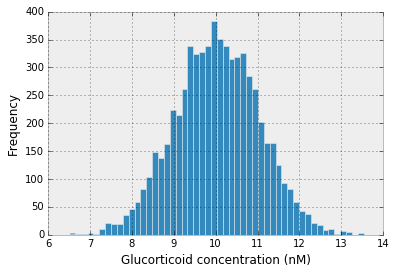

In [15]:
plt.hist(popn,bins=50)
plt.xlabel("Glucorticoid concentration (nM)")
plt.ylabel("Frequency")
pass

In [6]:
print("Mean glucorticoid concentration:", np.mean(popn))
print("Standard deviation of glucocorticoid concentration:", np.std(popn))

Mean glucorticoid concentration: 10.0257167668
Standard deviation of glucocorticoid concentration: 1.00065331822


## Take a random sample of the population of interest

We'll use the [`np.random.choice`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.choice.html) function to take a sample from our population of interest.

In [7]:
sample1 = np.random.choice(popn, size=25)

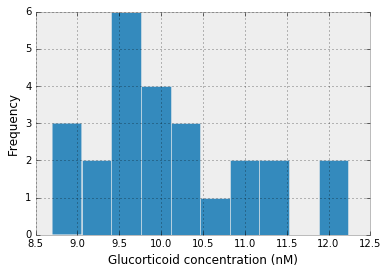

In [16]:
plt.hist(sample1)
plt.xlabel("Glucorticoid concentration (nM)")
plt.ylabel("Frequency")
pass

In [9]:
np.mean(sample1), np.std(sample1,ddof=1)

(10.114658118125904, 0.95536108734474512)

### Take a second random sample of size 25

In [10]:
sample2 = np.random.choice(popn, size=25)

In [11]:
np.mean(sample2), np.std(sample2,ddof=1)

(9.8548319370046187, 0.76063274167275385)

### Compare the first and second samples

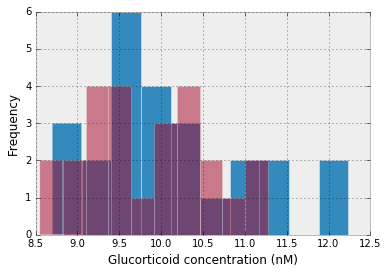

In [19]:
plt.hist(sample1)
plt.hist(sample2,alpha=0.5)
plt.xlabel("Glucorticoid concentration (nM)")
plt.ylabel("Frequency")
pass

 ## Generate a large number of samples of size 25 

Every time we take a random sample from our population of interest we'll get a different estimate of the mean and standard deviation (or whatever other statistics we're interested in).  To explore how well random samples of size 25 perform, generally, in terms of estimating the mean and standard deviation of the population of interest we need a large number of such samples. 

It's tedious to take one sample at a time, so we'll generate 100 samples of size 25, and calculate the mean and standard deviation for each of those samples (storing the means and standard deviations in lists).

In [18]:
means25 = []
std25 = []
for i in range(100):
    s = np.random.choice(popn, size=25)
    means25.append(np.mean(s))
    std25.append(np.std(s,ddof=1))

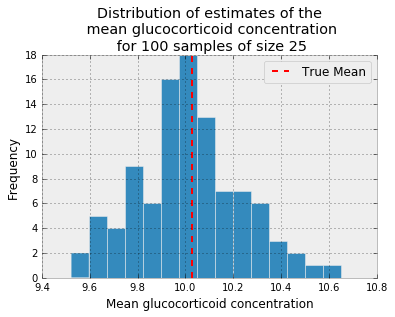

In [36]:
plt.hist(means25,bins=15)
plt.xlabel("Mean glucocorticoid concentration")
plt.ylabel("Frequency")
plt.title("Distribution of estimates of the\n mean glucocorticoid concentration\n for 100 samples of size 25")
plt.vlines(np.mean(popn), 0, 18, linestyle='dashed', color='red',label="True Mean")
plt.legend(loc="upper right")
pass

## Relative Frequency Histogram

A relative frequency histogram is like a frequency histogram, except the bin heights are given in fractions of the total sample size (relative frequency) rather than absolute frequency.  This is equivalent to adding the constraint that the total height of all the bars in the histogram will add to 1.0.

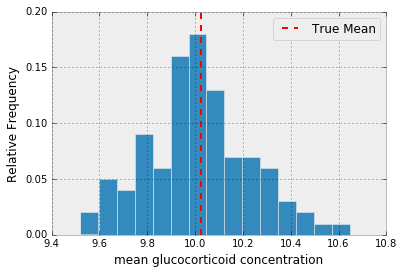

In [37]:
# Relative Frequency Histogram
plt.hist(means25, bins=15, weights=np.ones_like(means25) * (1.0/len(means25)))
plt.xlabel("mean glucocorticoid concentration")
plt.ylabel("Relative Frequency")
plt.vlines(np.mean(popn), 0, 0.20, linestyle='dashed', color='red',label="True Mean")
plt.legend(loc="upper right")
pass

## Density histogram
If instead of constraining the total height of the bars, we constrain the **total area** of the bars to sum to one, we call this a density histogram. When comparing histograms based on different numbers of samples, with different bin width, etc. you should usually use the density histogram.

The argument `normed=True` to the `pyplot.hist` function will this function calculate a density histogram instead of the default frequency histogram.

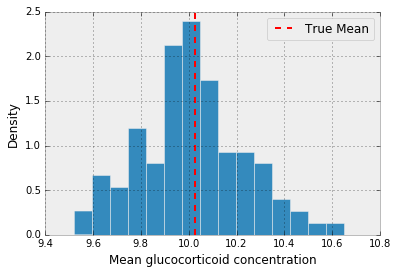

In [40]:
plt.hist(means25,bins=15,normed=True)
plt.xlabel("Mean glucocorticoid concentration")
plt.ylabel("Density")
plt.vlines(np.mean(popn), 0, 2.5, linestyle='dashed', color='red',label="True Mean")
plt.legend(loc="upper right")
pass

## How does the spread of our estimates of the mean change as sample size increases?

What happens as we increase the size of our samples?  Let's draw 100 random samples of size 50, 100, and 200 observations to compare.

In [39]:
means50 = []
std50 = []
for i in range(100):
    s = np.random.choice(popn, size=50)
    means50.append(np.mean(s))
    std50.append(np.std(s,ddof=1))
    
means100 = []
std100 = []
for i in range(100):
    s = np.random.choice(popn, size=100)
    means100.append(np.mean(s))
    std100.append(np.std(s,ddof=1))
    
means200 = []
std200 = []
for i in range(100):
    s = np.random.choice(popn, size=200)
    means200.append(np.mean(s))
    std200.append(np.std(s,ddof=1)) 

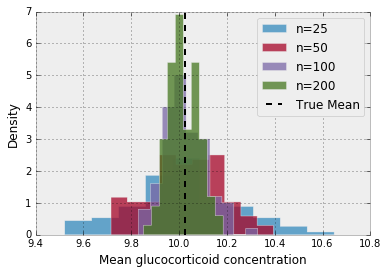

In [47]:
# the label arguments get used when we create a legend
plt.hist(means25,  normed=True, alpha=0.75, histtype="stepfilled", label="n=25")
plt.hist(means50,  normed=True, alpha=0.75, histtype="stepfilled", label="n=50")
plt.hist(means100, normed=True, alpha=0.75, histtype="stepfilled", label="n=100")
plt.hist(means200, normed=True, alpha=0.75, histtype="stepfilled", label="n=200")
plt.xlabel("Mean glucocorticoid concentration")
plt.ylabel("Density")
plt.vlines(np.mean(popn), 0, 7, linestyle='dashed', color='black',label="True Mean")
plt.legend()
pass

## Standard Error of the Mean

We see from the graph above that our estimates of the mean cluster more tightly about the true mean as our sample size increases.  Let's quantify that by calculating the standard deviation of our mean estimates as a function of sample size.

The standard deviation of the sampling distribution of a statistic of interest is called the "Standard Error" of that statistic.  Here, through simulation, we are estimating the "Standard Error of the Mean".

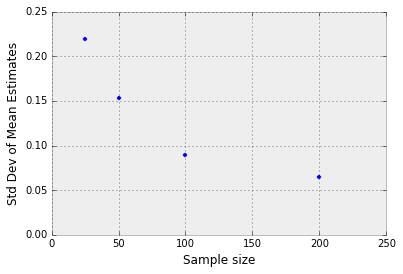

In [58]:
sm25 = np.std(means25,ddof=1)
sm50 = np.std(means50,ddof=1)
sm100 = np.std(means100,ddof=1)
sm200 = np.std(means200, ddof=1)

x = [25,50,100,200]
y = [sm25,sm50,sm100,sm200]
plt.scatter(x,y)
plt.xlabel("Sample size")
plt.ylabel("Std Dev of Mean Estimates")
pass

You can show mathematically for normally distributed data, that the expected Standard Error of the Mean as a function of sample size is:

$$
\mbox{Standard Error of Mean} = \frac{\sigma}{\sqrt{n}}
$$

where $\sigma$ is the population standard deviation, and $n$ is the sample size.

Let's compare that theoretical expectation to our simulated estimates.

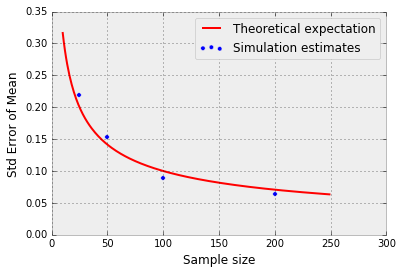

In [74]:
x = [25,50,100,200]
y = [sm25,sm50,sm100,sm200]
theory = [np.std(popn)/np.sqrt(i) for i in range(10,250)]
plt.scatter(x,y, label="Simulation estimates")
plt.plot(range(10,250), theory, color='red', label="Theoretical expectation")
plt.xlabel("Sample size")
plt.ylabel("Std Error of Mean")
plt.legend()
plt.xlim(0,300)
pass


## Standard Errors of the Standard Deviation

Above we explored how the spread in our estimates of the mean changed with sample size.  We can similarly explore how our estimates of the  standard deviation of the population change as we vary our sample size. 

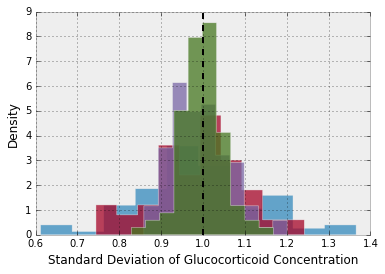

In [57]:
# the label arguments get used when we create a legend
plt.hist(std25,  normed=True, alpha=0.75, histtype="stepfilled", label="n=25")
plt.hist(std50,  normed=True, alpha=0.75, histtype="stepfilled", label="n=50")
plt.hist(std100, normed=True, alpha=0.75, histtype="stepfilled", label="n=100")
plt.hist(std200, normed=True, alpha=0.75, histtype="stepfilled", label="n=200")
plt.xlabel("Standard Deviation of Glucocorticoid Concentration")
plt.ylabel("Density")
plt.vlines(np.std(popn), 0, 9, linestyle='dashed', color='black',label="True Standard Deviation")
#plt.legend()
pass

You can show mathematically for normally distributed data, that the expected Standard Error of the Standard Deviation is approximately

$$
\mbox{Standard Error of Standard Deviation} \approx \frac{\sigma}{\sqrt{2(n-1)}}
$$

where $\sigma$ is the population standard deviation, and $n$ is the sample size.

Let's compare that theoretical expectation to our simulated estimates.

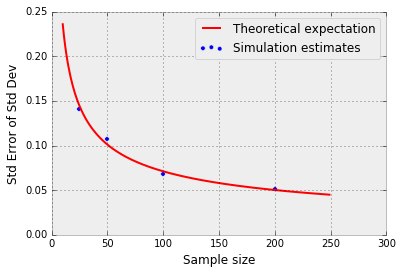

In [75]:
x = [25,50,100,200]
y = [ss25,ss50,ss100,ss200]
plt.scatter(x,y, label="Simulation estimates")
plt.xlabel("Sample size")
plt.ylabel("Std Error of Std Dev")

theory = [np.std(popn)/(np.sqrt(2.0*(i-1))) for i in range(10,250)]
plt.plot(range(10,250), theory, color='red', label="Theoretical expectation")

plt.xlim(0,300)
plt.legend()
pass
